In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./datasets/heart.csv')

In [2]:
data = np.asarray(df)

X = data[:,:-1]
y =  data[:,-1]

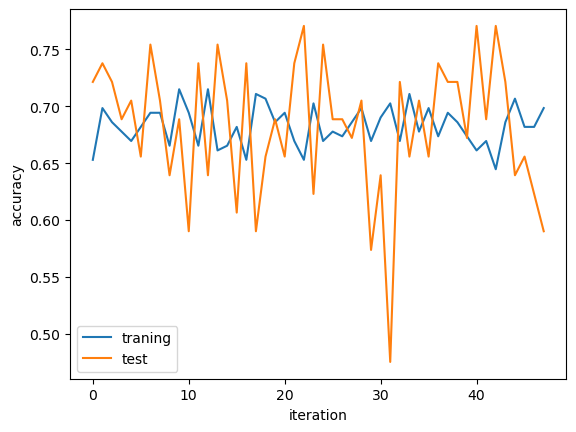

In [3]:
def clasification(X,y, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=random_state)
    model = SVC(kernel = 'poly', C = 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    return accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)

results_train = []
results_test = []
for i in range(2,50):
    results = clasification(X,y, i)
    results_train.append(results[0])
    results_test.append(results[1])
    
plt.plot(results_train, label="traning")
plt.plot(results_test, label="test")
plt.xlabel("iteration")
plt.ylabel("accuracy")
plt.legend()

In [5]:
from sklearn import preprocessing as p
data_ss = p.StandardScaler().fit_transform(X)
data_ss
#standaryzacja danych - dopasowanie do rozkładu normalnego

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

0.9204545454545453
0.8142076502732238


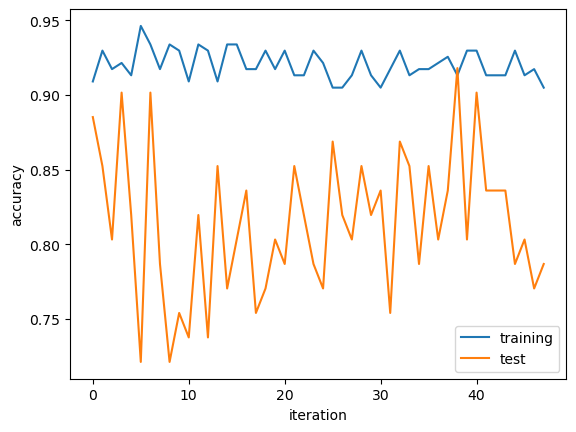

In [33]:
def clasification(X,y, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=random_state)
    model = SVC(kernel = 'poly', degree=3, C = 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    return accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)

results_train = []
results_test = []
for i in range(2,50):
    results = clasification(data_ss,y, i)
    results_train.append(results[0])
    results_test.append(results[1])

plt.plot(results_train, label="training")
plt.plot(results_test, label="test")
plt.xlabel("iteration")
plt.ylabel("accuracy")
plt.legend()
print(sum(results_train)/len(results_train))
print(sum(results_test)/len(results_test))

In [7]:
data_mm = p.MinMaxScaler().fit_transform(X)
data_mm

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

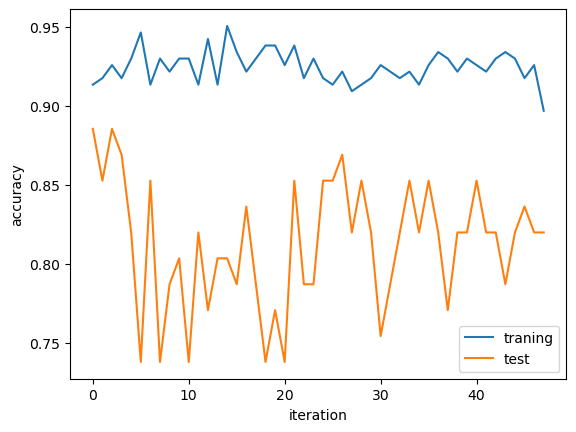

In [28]:
def clasification(X,y, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=random_state)
    model = SVC(kernel = 'poly',degree=3, C = 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    return accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)

results_train = []
results_test = []
for i in range(2,50):
    results = clasification(data_mm,y, i)
    results_train.append(results[0])
    results_test.append(results[1])
    
plt.plot(results_train, label="traning")
plt.plot(results_test, label="test")
plt.xlabel("iteration")
plt.ylabel("accuracy")
plt.legend()

In [9]:
#Metody, które poprawiają jakość uczenia
#normalizacja, standaryzacja, c, degree